In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Tabela_geral_2019_nova.csv")

In [3]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

# Análise Tradicional 

In [4]:
df['Ar_Pts_C'] = df['Pts_3_C'] + df['Pts_2_C']
df['Ar_Pts_T'] = df['Pts_3_T'] + df['Pts_2_T']
df['posse_de_bola'] = df['Ar_Pts_T'] - df['RO'] + df['ER'] + (0.4 * df['LL_Pts_T'])
df['Min'] = df['Min'].str.replace(':', '.')
df['Min'] = df.Min.astype(float)

In [5]:
df.head()

,Njogador,Temporada,Time,Adv,C_F,Jogador,Min,Pts_C,Pts_T,Pts_3_C,...,AS,BR,TO,FC,FR,ER,EN,Ar_Pts_C,Ar_Pts_T,posse_de_bola
0,0,19,UNIFACISA,São Paulo,1,Barnes,33.7,23,44,4,...,5,0,0,4,4,2,0,7,15,19.4
1,1,19,UNIFACISA,São Paulo,1,Gemerson,31.8,18,29,2,...,3,1,0,5,3,1,1,8,12,9.4
2,2,19,UNIFACISA,São Paulo,1,Dixson,24.2,17,27,1,...,0,1,2,4,2,1,2,6,10,12.6
3,3,19,UNIFACISA,São Paulo,1,Miller,23.1,15,35,3,...,0,0,0,4,0,1,0,6,14,14.0
4,4,19,UNIFACISA,São Paulo,1,Antonio,20.4,10,16,0,...,2,1,0,2,3,1,1,4,6,6.8


In [6]:
df.columns

Index(['Njogador', 'Temporada', 'Time', 'Adv', 'C_F', 'Jogador', 'Min',
       'Pts_C', 'Pts_T', 'Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T',
       'LL_Pts_C', 'LL_Pts_T', 'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR',
       'ER', 'EN', 'Ar_Pts_C', 'Ar_Pts_T', 'posse_de_bola'],
      dtype='object')

# Análise Avançada

As análises avançadas são compostas pelos seguintes indicadores 

* EF_Pts     -> Eficiência dos pontos totais
* FR_3_Pts_C -> Frequência relativa do 3 pontos convertidos
* FR_3_Pts_T -> Frequência relativa do 3 pontos tentados
* EF_Pts_3   -> Eficiência dos 3 pontos
* FR_2_Pts_C -> Frequência relativa do 2 pontos convertidos
* FR_2_Pts_T -> Frequência relativa do 2 pontos tentados
* EF_Pts_2   -> Eficiência dos 2 pontos
* FR_LL_C    -> Frequência relativa dos Lances Livres convertidos
* FR_LL_T    -> Frequência relativa dos Lances Livres tentados
* EF_LL      -> Eficiência dos Lances Livres
* Pace       -> 
* eFG_%      -> Aproveitamento efetivo dos pontos
* TOV_%      -> Fator turnover
* FTA/FGA    -> Fator de aproveitamento dos lances livres
* ORB%       -> 
* Posse_de_Bola -> Posse de Bola
* Offensive_Rating -> pontos por posse de bola com o ajusto de 100 posses
* TS_%       -> Porcentagem dos arremessos
* Ass/ER     -> Assistência por erros
* AS_Ratio   -> Assistências por posse de bola

In [7]:
analise = pd.DataFrame()

In [8]:
analise['Temporada'] = df['Temporada']  # temporada
analise['Time'] = df['Time']  # time
analise['Adv'] = df['Adv']  # adversário
analise['C_F'] = df['C_F']  # casa/fora
analise['Jogador'] = df['Jogador']  # Jogadores
analise['Min'] = df['Min']  # minutos
analise['EF_Pts'] = round(df['Pts_C'] / df['Pts_T'], 3) # eficiência dos pontos totais
analise['FR_3_Pts_C'] = round((df['Pts_3_C'] * 3) / df['Pts_C'], 3)  # frequência relativa do 3 pontos convertidos 
analise['FR_3_Pts_T'] = round((df['Pts_3_T'] * 3) / df['Pts_T'], 3)  # frequência relativa do 3 pontos tentados 
analise['EF_Pts_3'] = round(df['Pts_3_C'] / df['Pts_3_T'], 3)  # eficiência dos 3 pontos 
analise['FR_2_Pts_C'] = round((df['Pts_2_C'] * 2) / df['Pts_C'], 3)  # frequência relativa do 2 pontos convertidos
analise['FR_2_Pts_T'] = round((df['Pts_2_T'] * 2) / df['Pts_T'], 3)  # frequência relativa do 2 pontos tentados 
analise['EF_Pts_2'] = round(df['Pts_2_C'] / df['Pts_2_T'], 3)  # eficiência dos 2 pontos
analise['FR_LL_C'] = round(df['LL_Pts_C'] / df['Pts_C'], 3)  # frequência relativa dos Lances Livres convertidos
analise['FR_LL_T'] = round(df['LL_Pts_T'] / df['Pts_T'], 3)  # frequência relativa dos Lances Livres tentados
analise['EF_LL'] = round(df['LL_Pts_C'] /df['LL_Pts_T'], 3)  # eficiência dos Lances Livres
# analise['Pace']
# four fectores
analise['eFG_%'] = round((df['Ar_Pts_C'] + 0.5 * df['Pts_3_C']) / df['Ar_Pts_T'], 3)  #  aproveitamento efetivo
analise['TOV_%'] = round(100 * df['ER'] / (df['Ar_Pts_T'] + 0.475 * df['LL_Pts_T'] + df['ER']), 1)  # fator turnover
analise['FTA/FGA'] = round(df['LL_Pts_T'] / df['Ar_Pts_C'], 3)  # fator de aproveitamento dos lances livres
# analise['ORB%'] =  # precisa do resultado do time adv

analise['Posse_de_Bola']  = df['posse_de_bola']   # posse de bola 
analise['Offensive_Rating'] = 100 * round(df['Pts_C']/df['posse_de_bola'], 3) # pontos por posse de bola com o ajusto de 100 posses

analise['TS_%'] = round(df['Pts_C'] / (2*(df['Ar_Pts_T'] + 0.475 * df['LL_Pts_T'])), 3)  # porcentagem dos arremessos
analise['Ass/ER'] = round(df['AS'] / df['ER'], 3)  # assistência por erros
analise['AS_Ratio'] = 100 * round((df['AS'] / df['posse_de_bola']), 3)  # assistências por posse de bola 
analise.reset_index();

In [9]:
analise.head()

,Temporada,Time,Adv,C_F,Jogador,Min,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,...,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
0,19,UNIFACISA,São Paulo,1,Barnes,33.7,0.523,0.522,0.545,0.500,...,0.136,0.833,0.600,10.1,0.857,19.4,118.6,0.644,2.5,25.8
1,19,UNIFACISA,São Paulo,1,Gemerson,31.8,0.621,0.333,0.414,0.500,...,0.034,0.000,0.750,7.4,0.125,9.4,191.5,0.721,3.0,31.9
2,19,UNIFACISA,São Paulo,1,Dixson,24.2,0.630,0.176,0.333,0.333,...,0.148,1.000,0.650,7.8,0.667,12.6,134.9,0.714,0.0,0.0
3,19,UNIFACISA,São Paulo,1,Miller,23.1,0.429,0.600,0.600,0.429,...,0.000,NaN,0.536,6.7,0.000,14.0,107.1,0.536,0.0,0.0
4,19,UNIFACISA,São Paulo,1,Antonio,20.4,0.625,0.000,0.375,0.000,...,0.125,1.000,0.667,12.6,0.500,6.8,147.1,0.719,2.0,29.4


In [10]:
analise.columns

Index(['Temporada', 'Time', 'Adv', 'C_F', 'Jogador', 'Min', 'EF_Pts',
       'FR_3_Pts_C', 'FR_3_Pts_T', 'EF_Pts_3', 'FR_2_Pts_C', 'FR_2_Pts_T',
       'EF_Pts_2', 'FR_LL_C', 'FR_LL_T', 'EF_LL', 'eFG_%', 'TOV_%', 'FTA/FGA',
       'Posse_de_Bola', 'Offensive_Rating', 'TS_%', 'Ass/ER', 'AS_Ratio'],
      dtype='object')

# Análise por Minuto

In [11]:
minutos = pd.DataFrame()

In [12]:
minutos['Temporada'] = df['Temporada']  # temporada
minutos['Time'] = df['Time']  # time
minutos['Adv'] = df['Adv']  # adversário
minutos['C_F'] = df['C_F']  # casa/fora
minutos['Jogador'] = df['Jogador']  # Jogadores
minutos['Min'] = df['Min']  # minutos
indicadores = ['Pts_C', 'Pts_T', 'Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T',
       'LL_Pts_C', 'LL_Pts_T', 'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR',
       'ER', 'EN', 'Ar_Pts_C', 'Ar_Pts_T']

In [13]:
for x in indicadores:
    minutos[f'{x}/Min'] = round(df[x] / df['Min'], 3)
minutos

,Temporada,Time,Adv,C_F,Jogador,Min,Pts_C/Min,Pts_T/Min,Pts_3_C/Min,Pts_3_T/Min,...,RT/Min,AS/Min,BR/Min,TO/Min,FC/Min,FR/Min,ER/Min,EN/Min,Ar_Pts_C/Min,Ar_Pts_T/Min
0,19,UNIFACISA,São Paulo,1,Barnes,33.70,0.682,1.306,0.119,0.237,...,0.000,0.148,0.000,0.000,0.119,0.119,0.059,0.000,0.208,0.445
1,19,UNIFACISA,São Paulo,1,Gemerson,31.80,0.566,0.912,0.063,0.126,...,0.314,0.094,0.031,0.000,0.157,0.094,0.031,0.031,0.252,0.377
2,19,UNIFACISA,São Paulo,1,Dixson,24.20,0.702,1.116,0.041,0.124,...,0.083,0.000,0.041,0.083,0.165,0.083,0.041,0.083,0.248,0.413
3,19,UNIFACISA,São Paulo,1,Miller,23.10,0.649,1.515,0.130,0.303,...,0.216,0.000,0.000,0.000,0.173,0.000,0.043,0.000,0.260,0.606
4,19,UNIFACISA,São Paulo,1,Antonio,20.40,0.490,0.784,0.000,0.098,...,0.245,0.098,0.049,0.000,0.098,0.147,0.049,0.049,0.196,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,19,Flamengo,Minas,2,Ruan,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5075,19,Flamengo,Minas,2,Zach Graham,29.02,0.586,0.689,0.034,0.069,...,0.103,0.034,0.000,0.000,0.069,0.069,0.069,0.000,0.241,0.276
5076,19,Flamengo,Minas,2,Léo Demétrio,15.51,0.903,1.547,0.000,0.129,...,0.258,0.000,0.000,0.000,0.193,0.000,0.064,0.000,0.451,0.709
5077,19,Flamengo,Minas,2,Ações coletivas,0.00,NaN,NaN,NaN,NaN,...,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Análise do Unifacisa 

Pegamos apenas o time do UNIFACISA e os resultados dos jogos

Tipo de análise que temos

- Tradicional: corresponde com todos os indicadores brutos dos jogos 
- Avançadas: corresponde com parametros derivados dos dados brutos
- Tempo: correspondem aos indicadores técnicos dividido pelo tempo 

Para analisarmos os indicadores técnicos precisamos separa-los em partes 
- Casa e Fora 
- Vitória ou Derrota
- Classificação/ 1 turnos/ 2 turno/ Playoffs  
- Ao longo do periodo da competição (Data)
- Todos os jogadroes, como também as suas 'posições' 

Oponentes é uma classe separada que apresenta todas os tipos de análise (Tradicional/Avançado), como também as separações

In [14]:
jogos_unifacisa = df[(df['Jogador'] == 'Equipe') & (df['Time'] == 'UNIFACISA')]

In [15]:
jogos_unifacisa.head()

,Njogador,Temporada,Time,Adv,C_F,Jogador,Min,Pts_C,Pts_T,Pts_3_C,...,AS,BR,TO,FC,FR,ER,EN,Ar_Pts_C,Ar_Pts_T,posse_de_bola
12,12,19,UNIFACISA,São Paulo,1,Equipe,0.0,103,199,13,...,21,5,2,27,16,9,6,38,75,81.4
224,12,19,UNIFACISA,Paulistano,1,Equipe,0.0,101,213,16,...,22,2,4,16,17,8,1,34,74,75.4
577,11,19,UNIFACISA,Rio Claro,2,Equipe,0.0,80,168,9,...,14,3,4,24,22,13,1,27,60,71.6
697,11,19,UNIFACISA,Pato Basquete,2,Equipe,0.0,61,163,5,...,14,6,3,16,18,16,1,23,62,74.2
930,12,19,UNIFACISA,Bauru,1,Equipe,0.0,83,169,15,...,25,10,3,18,14,11,4,31,63,70.6


In [16]:
jogos_unifacisa.columns

Index(['Njogador', 'Temporada', 'Time', 'Adv', 'C_F', 'Jogador', 'Min',
       'Pts_C', 'Pts_T', 'Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T',
       'LL_Pts_C', 'LL_Pts_T', 'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR',
       'ER', 'EN', 'Ar_Pts_C', 'Ar_Pts_T', 'posse_de_bola'],
      dtype='object')

### Tradicional

In [17]:
jogos_unifacisa.describe()

,Njogador,Temporada,C_F,Min,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,AS,BR,TO,FC,FR,ER,EN,Ar_Pts_C,Ar_Pts_T,posse_de_bola
count,27.000000,27.0,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,11.592593,19.0,1.444444,0.0,83.185185,177.444444,10.148148,28.814815,19.703704,36.703704,...,18.370370,6.666667,2.629630,19.962963,18.518519,12.740741,2.074074,29.851852,65.518519,75.125926
std,0.747265,0.0,0.506370,0.0,11.156361,14.407085,3.820025,5.993824,3.800960,5.882273,...,3.498881,2.974248,1.497386,3.480511,2.679988,3.346555,1.491667,4.329716,4.972001,4.011579
min,10.000000,19.0,1.000000,0.0,61.000000,151.000000,5.000000,19.000000,11.000000,24.000000,...,13.000000,2.000000,0.000000,15.000000,14.000000,7.000000,0.000000,22.000000,53.000000,68.600000
25%,11.000000,19.0,1.000000,0.0,76.000000,168.500000,7.500000,25.000000,17.500000,33.500000,...,15.000000,5.000000,2.000000,17.000000,17.000000,10.000000,1.000000,27.000000,62.500000,72.100000
50%,12.000000,19.0,1.000000,0.0,81.000000,175.000000,9.000000,29.000000,19.000000,36.000000,...,19.000000,6.000000,2.000000,20.000000,18.000000,12.000000,2.000000,30.000000,66.000000,75.000000
75%,12.000000,19.0,2.000000,0.0,90.000000,186.000000,13.000000,32.000000,22.500000,42.000000,...,21.000000,9.000000,4.000000,22.000000,20.000000,15.000000,3.000000,32.500000,68.000000,77.500000
max,13.000000,19.0,2.000000,0.0,103.000000,213.000000,21.000000,44.000000,27.000000,48.000000,...,25.000000,12.000000,6.000000,27.000000,24.000000,19.000000,6.000000,38.000000,75.000000,86.000000


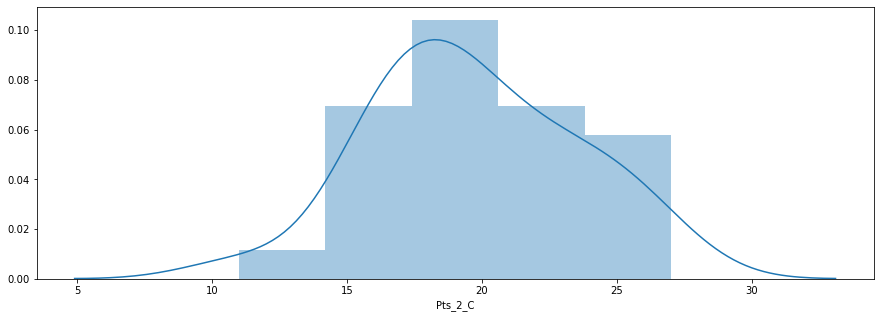

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(jogos_unifacisa['Pts_2_C'])

### Avançada

De tarde precisa acrescentar as outras análises  

In [19]:
analise_unifacisa = analise[(analise['Jogador'] == 'Equipe') & (analise['Time'] == 'UNIFACISA')]

In [20]:
analise_unifacisa.describe()

,Temporada,C_F,Min,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,FR_2_Pts_C,FR_2_Pts_T,EF_Pts_2,...,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
count,27.0,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,19.0,1.444444,0.0,0.468667,0.358593,0.484815,0.350185,0.480037,0.416185,0.538222,...,0.098296,0.751185,0.532741,14.725926,0.603407,75.125926,110.622222,0.563593,1.556926,24.455556
std,0.0,0.506370,0.0,0.050035,0.099946,0.076667,0.098844,0.100098,0.072810,0.067960,...,0.027125,0.133983,0.074376,3.703802,0.223594,4.011579,12.629737,0.063890,0.537046,4.481443
min,19.0,1.000000,0.0,0.374000,0.200000,0.328000,0.192000,0.222000,0.257000,0.381000,...,0.047000,0.375000,0.410000,8.700000,0.290000,68.600000,82.200000,0.447000,0.684000,16.800000
25%,19.0,1.000000,0.0,0.436000,0.283000,0.437000,0.276000,0.429500,0.370000,0.493500,...,0.080000,0.667000,0.477000,12.300000,0.428500,72.100000,101.050000,0.521500,1.122000,20.300000
50%,19.0,1.000000,0.0,0.467000,0.351000,0.483000,0.344000,0.468000,0.414000,0.552000,...,0.098000,0.800000,0.525000,14.300000,0.571000,75.000000,111.700000,0.554000,1.538000,24.700000
75%,19.0,2.000000,0.0,0.505000,0.417000,0.529000,0.413000,0.522000,0.468500,0.589000,...,0.121000,0.844000,0.580500,17.200000,0.717500,77.500000,118.750000,0.616500,2.000000,27.950000
max,19.0,2.000000,0.0,0.562000,0.636000,0.642000,0.538000,0.684000,0.552000,0.628000,...,0.156000,0.917000,0.664000,21.400000,1.182000,86.000000,134.000000,0.687000,2.750000,35.400000


### Minutos

In [21]:
minutos_unifacisa = minutos[(minutos['Jogador'] == 'Equipe') & (minutos['Time'] == 'UNIFACISA')]

In [22]:
minutos_unifacisa

,Temporada,Time,Adv,C_F,Jogador,Min,Pts_C/Min,Pts_T/Min,Pts_3_C/Min,Pts_3_T/Min,...,RT/Min,AS/Min,BR/Min,TO/Min,FC/Min,FR/Min,ER/Min,EN/Min,Ar_Pts_C/Min,Ar_Pts_T/Min
12,19,UNIFACISA,São Paulo,1,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
224,19,UNIFACISA,Paulistano,1,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
577,19,UNIFACISA,Rio Claro,2,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
697,19,UNIFACISA,Pato Basquete,2,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
930,19,UNIFACISA,Bauru,1,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1056,19,UNIFACISA,Sesi Franca,1,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1285,19,UNIFACISA,São José,2,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1385,19,UNIFACISA,Mogi,2,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1533,19,UNIFACISA,Botafogo,2,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1607,19,UNIFACISA,Flamengo,2,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


# Análise do jogo em casa/fora do Time

### Tradicional

In [23]:
jogos_unifacisa.groupby('C_F').mean()

,Njogador,Temporada,Min,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,LL_Pts_C,...,AS,BR,TO,FC,FR,ER,EN,Ar_Pts_C,Ar_Pts_T,posse_de_bola
C_F,,,,,,,,,,,,,,,,,,,,,
1,12.000000,19.0,0.0,85.733333,182.933333,11.533333,31.266667,19.133333,35.866667,12.866667,...,18.400000,7.2,2.400000,19.600000,18.000000,10.800000,2.266667,30.666667,67.133333,74.440000
2,11.083333,19.0,0.0,80.000000,170.583333,8.416667,25.750000,20.416667,37.750000,13.916667,...,18.333333,6.0,2.916667,20.416667,19.166667,15.166667,1.833333,28.833333,63.500000,75.983333


### Avançada

In [24]:
analise_unifacisa.groupby('C_F').mean()

,Temporada,Min,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,FR_2_Pts_C,FR_2_Pts_T,EF_Pts_2,FR_LL_C,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
C_F,,,,,,,,,,,,,,,,,,,,
1,19,0.0,0.468333,0.398533,0.511133,0.366000,0.452467,0.394533,0.532133,0.149133,0.093733,0.724400,0.542800,12.586667,0.577067,74.440000,114.953333,0.569200,1.790800,24.733333
2,19,0.0,0.469083,0.308667,0.451917,0.330417,0.514500,0.443250,0.545833,0.177000,0.104000,0.784667,0.520167,17.400000,0.636333,75.983333,105.208333,0.556583,1.264583,24.108333


### Minutos

In [25]:
minutos_unifacisa.groupby('C_F').mean()

,Temporada,Min,Pts_C/Min,Pts_T/Min,Pts_3_C/Min,Pts_3_T/Min,Pts_2_C/Min,Pts_2_T/Min,LL_Pts_C/Min,LL_Pts_T/Min,...,RT/Min,AS/Min,BR/Min,TO/Min,FC/Min,FR/Min,ER/Min,EN/Min,Ar_Pts_C/Min,Ar_Pts_T/Min
C_F,,,,,,,,,,,,,,,,,,,,,
1,19,0.0,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,19,0.0,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


# Análise da vitória/derrota do Time

### Tradicional 

### Avançada

### Minutos

# Análise da fase de classificação (1°/2°) e Playoffs do Time

### Tradicional 

### Avançada

### Minutos

# Análise ao longo da Temporada do Time

### Tradicional 

### Avançada

### Minutos

# Entre os Times Oponentes
##### precisa fazer um novo datafreme para pegar os oponentes e depos fazer a soma deles 

In [26]:
oponente_time = df[(df['Jogador'] == 'Equipe') & (df['Adv'] == 'UNIFACISA')]

### Análise Tradicional Oponente

In [27]:
oponente_time.describe()

,Njogador,Temporada,C_F,Min,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,AS,BR,TO,FC,FR,ER,EN,Ar_Pts_C,Ar_Pts_T,posse_de_bola
count,27.000000,27.0,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,11.259259,19.0,1.555556,0.0,81.000000,176.851852,8.333333,25.962963,20.888889,39.851852,...,16.444444,6.111111,1.740741,19.000000,19.666667,12.740741,1.444444,29.222222,65.814815,74.962963
std,0.813000,0.0,0.506370,0.0,11.922829,18.022857,3.731364,7.778083,3.724486,6.496767,...,4.466399,2.665064,1.258589,2.814796,3.540969,2.994772,1.281025,4.200122,6.183334,3.891228
min,10.000000,19.0,1.000000,0.0,55.000000,139.000000,3.000000,12.000000,11.000000,24.000000,...,7.000000,1.000000,0.000000,14.000000,14.000000,5.000000,0.000000,22.000000,51.000000,68.400000
25%,11.000000,19.0,1.000000,0.0,74.000000,163.000000,6.000000,20.000000,18.500000,35.500000,...,13.000000,4.000000,1.000000,17.000000,17.000000,11.500000,0.000000,27.000000,62.000000,72.700000
50%,11.000000,19.0,2.000000,0.0,83.000000,177.000000,8.000000,27.000000,21.000000,41.000000,...,16.000000,6.000000,2.000000,19.000000,19.000000,13.000000,1.000000,30.000000,66.000000,74.400000
75%,12.000000,19.0,2.000000,0.0,90.500000,189.500000,10.000000,31.000000,23.000000,44.500000,...,19.000000,8.000000,2.000000,21.500000,22.000000,15.000000,2.000000,32.000000,69.000000,77.600000
max,12.000000,19.0,2.000000,0.0,106.000000,213.000000,21.000000,43.000000,28.000000,52.000000,...,25.000000,11.000000,4.000000,24.000000,27.000000,17.000000,4.000000,37.000000,78.000000,84.400000


### Análise Avançada Oponente

In [28]:
analise_oponente = pd.DataFrame()

In [29]:
analise_oponente['Temporada'] = oponente_time['Temporada']  # temporada
analise_oponente['Time'] = oponente_time['Time']  # time
analise_oponente['Adv'] = oponente_time['Adv']  # adversário
analise_oponente['C_F'] = oponente_time['C_F']  # casa/fora
analise_oponente['EF_Pts'] = round(oponente_time['Pts_C'] / oponente_time['Pts_T'], 3) # eficiência dos pontos totais
analise_oponente['FR_3_Pts_C'] = round((oponente_time['Pts_3_C'] * 3) / oponente_time['Pts_C'], 3)  # frequência relativa do 3 pontos convertidos 
analise_oponente['FR_3_Pts_T'] = round((oponente_time['Pts_3_T'] * 3) / oponente_time['Pts_T'], 3)  # frequência relativa do 3 pontos tentados 
analise_oponente['EF_Pts_3'] = round(oponente_time['Pts_3_C'] / oponente_time['Pts_3_T'], 3)  # eficiência dos 3 pontos 
analise_oponente['FR_2_Pts_C'] = round((oponente_time['Pts_2_C'] * 2) / oponente_time['Pts_C'], 3)  # frequência relativa do 2 pontos convertidos
analise_oponente['FR_2_Pts_T'] = round((oponente_time['Pts_2_T'] * 2) / oponente_time['Pts_T'], 3)  # frequência relativa do 2 pontos tentados 
analise_oponente['EF_Pts_2'] = round(oponente_time['Pts_2_C'] / oponente_time['Pts_2_T'], 3)  # eficiência dos 2 pontos
analise_oponente['FR_LL_C'] = round(oponente_time['LL_Pts_C'] / oponente_time['Pts_C'], 3)  # frequência relativa dos Lances Livres convertidos
analise_oponente['FR_LL_T'] = round(oponente_time['LL_Pts_T'] / oponente_time['Pts_T'], 3)  # frequência relativa dos Lances Livres tentados
analise_oponente['EF_LL'] = round(oponente_time['LL_Pts_C'] /oponente_time['LL_Pts_T'], 3)  # eficiência dos Lances Livres
# analise['Pace']
# four fectores
analise_oponente['eFG_%'] = round((oponente_time['Ar_Pts_C'] + 0.5 * oponente_time['Pts_3_C']) / oponente_time['Ar_Pts_T'], 3)  #  aproveitamento efetivo
analise_oponente['TOV_%'] = round(100 * oponente_time['ER'] / (oponente_time['Ar_Pts_T'] + 0.475 * oponente_time['LL_Pts_T'] + oponente_time['ER']), 1)  # fator turnover
analise_oponente['FTA/FGA'] = oponente_time['LL_Pts_T'] / oponente_time['Ar_Pts_C']  # fator de aproveitamento dos lances livres
# analise['ORB%'] =  # precisa do resultado do time adv

analise_oponente['Posse_de_Bola']  = oponente_time['posse_de_bola']   # posse de bola 
analise_oponente['Offensive_Rating'] = 100 * round(oponente_time['Pts_C']/oponente_time['posse_de_bola'], 3) # pontos por posse de bola com o ajusto de 100 posses

analise_oponente['TS_%'] = round(oponente_time['Pts_C'] / (2*(oponente_time['Ar_Pts_T'] + 0.475 * oponente_time['LL_Pts_T'])), 3)  # porcentagem dos arremessos
analise_oponente['Ass/ER'] = round(oponente_time['AS'] / oponente_time['ER'], 3)  # assistência por erros
analise_oponente['AS_Ratio'] = 100 * round((oponente_time['AS'] / oponente_time['posse_de_bola']), 3)  # assistências por posse de bola 
analise_oponente.reset_index();

In [30]:
analise_oponente.describe()

,Temporada,C_F,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,FR_2_Pts_C,FR_2_Pts_T,EF_Pts_2,FR_LL_C,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
count,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,19.0,1.555556,0.460296,0.300444,0.434556,0.322963,0.523222,0.456037,0.527889,0.176259,0.107296,0.763074,0.510148,14.614815,0.659191,74.962963,107.877778,0.543407,1.451630,21.888889
std,0.0,0.506370,0.067912,0.098915,0.099041,0.098514,0.092939,0.090039,0.075503,0.044854,0.033653,0.104544,0.088202,3.630925,0.211878,3.891228,13.849863,0.081210,0.899866,5.616414
min,19.0,1.000000,0.311000,0.150000,0.220000,0.143000,0.208000,0.253000,0.367000,0.089000,0.062000,0.615000,0.338000,5.700000,0.305556,68.400000,80.400000,0.361000,0.583000,10.200000
25%,19.0,1.000000,0.421000,0.234000,0.370000,0.258000,0.494000,0.401000,0.474500,0.139000,0.080500,0.665500,0.444000,12.950000,0.490741,72.700000,97.750000,0.484500,1.000000,17.750000
50%,19.0,2.000000,0.459000,0.289000,0.448000,0.321000,0.533000,0.454000,0.522000,0.183000,0.106000,0.765000,0.515000,15.000000,0.666667,74.400000,109.400000,0.555000,1.273000,21.200000
75%,19.0,2.000000,0.510000,0.354000,0.503000,0.384000,0.577000,0.516500,0.569000,0.198000,0.117000,0.837500,0.566500,16.500000,0.798077,77.600000,117.800000,0.606500,1.436000,24.800000
max,19.0,2.000000,0.583000,0.594000,0.606000,0.568000,0.667000,0.611000,0.683000,0.267000,0.207000,1.000000,0.697000,21.900000,1.062500,84.400000,132.900000,0.700000,5.000000,33.100000


### Análise Minutos do Oponentes

In [31]:
minutos_oponente = pd.DataFrame()

In [32]:
minutos_oponente['Temporada'] = oponente_time['Temporada']  # temporada
minutos_oponente['Time'] = oponente_time['Time']  # time
minutos_oponente['Adv'] = oponente_time['Adv']  # adversário
minutos_oponente['C_F'] = oponente_time['C_F']  # casa/fora
minutos_oponente['Jogador'] = oponente_time['Jogador']  # Jogadores
minutos_oponente['Min'] = oponente_time['Min']  # minutos
indicadores = ['Pts_C', 'Pts_T', 'Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T',
       'LL_Pts_C', 'LL_Pts_T', 'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR',
       'ER', 'EN', 'Ar_Pts_C', 'Ar_Pts_T']

In [33]:
for x in indicadores:
    minutos_oponente[f'{x}/Min'] = round(oponente_time[x] / oponente_time['Min'], 3)
minutos_oponente

,Temporada,Time,Adv,C_F,Jogador,Min,Pts_C/Min,Pts_T/Min,Pts_3_C/Min,Pts_3_T/Min,...,RT/Min,AS/Min,BR/Min,TO/Min,FC/Min,FR/Min,ER/Min,EN/Min,Ar_Pts_C/Min,Ar_Pts_T/Min
25,19,São Paulo,UNIFACISA,2,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
236,19,Paulistano,UNIFACISA,2,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,NaN,inf,inf,inf,inf,inf,inf
565,19,Rio Claro,UNIFACISA,1,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,NaN,inf,inf
685,19,Pato Basquete,UNIFACISA,1,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,NaN,inf,inf
941,19,Bauru,UNIFACISA,2,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1067,19,Sesi Franca,UNIFACISA,2,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1274,19,São José,UNIFACISA,1,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,NaN,inf,inf,inf,inf,inf,inf
1373,19,Mogi,UNIFACISA,1,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1521,19,Botafogo,UNIFACISA,1,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1595,19,Flamengo,UNIFACISA,1,Equipe,0.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


# Análise do jogo em casa/fora Oponente

### Tradicional

In [34]:
oponente_time.groupby('C_F').mean()

,Njogador,Temporada,Min,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,LL_Pts_C,...,AS,BR,TO,FC,FR,ER,EN,Ar_Pts_C,Ar_Pts_T,posse_de_bola
C_F,,,,,,,,,,,,,,,,,,,,,
1,11.666667,19.0,0.0,84.583333,183.333333,8.25,27.250000,22.083333,40.250000,15.666667,...,17.416667,7.583333,2.166667,19.75,20.083333,12.250000,1.333333,30.333333,67.500000,75.966667
2,10.933333,19.0,0.0,78.133333,171.666667,8.40,24.933333,19.933333,39.533333,13.066667,...,15.666667,4.933333,1.400000,18.40,19.333333,13.133333,1.533333,28.333333,64.466667,74.160000


### Avançada

In [35]:
analise_oponente.groupby('C_F').mean()

,Temporada,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,FR_2_Pts_C,FR_2_Pts_T,EF_Pts_2,FR_LL_C,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
C_F,,,,,,,,,,,,,,,,,,,
1,19,0.465083,0.294333,0.437667,0.318500,0.520083,0.446250,0.54925,0.185750,0.114250,0.766500,0.512500,13.675000,0.699233,75.966667,111.408333,0.548667,1.672500,22.916667
2,19,0.456467,0.305333,0.432067,0.326533,0.525733,0.463867,0.51080,0.168667,0.101733,0.760333,0.508267,15.366667,0.627157,74.160000,105.053333,0.539200,1.274933,21.066667


### Minutos

In [36]:
minutos_oponente.groupby('C_F').mean()

,Temporada,Min,Pts_C/Min,Pts_T/Min,Pts_3_C/Min,Pts_3_T/Min,Pts_2_C/Min,Pts_2_T/Min,LL_Pts_C/Min,LL_Pts_T/Min,...,RT/Min,AS/Min,BR/Min,TO/Min,FC/Min,FR/Min,ER/Min,EN/Min,Ar_Pts_C/Min,Ar_Pts_T/Min
C_F,,,,,,,,,,,,,,,,,,,,,
1,19,0.0,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,19,0.0,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


# Análise da vitória/derrota Oponente

### Tradicional 

### Avançada

### Minutos

# Análise da fase de classificação (1°/2°) e Playoffs Oponente

### Tradicional 

### Avançada

### Minutos

# Análise ao longo da Temporada Oponente

### Tradicional 

### Avançada

### Minutos

# Análise da distribuição dos jogadores no seu elenco

In [37]:
jogadores_unifacisa = df[(df['Jogador'] != 'Equipe') & (df['Time'] == 'UNIFACISA') & (df['Jogador'] != 'Ações coletivas')]

In [38]:
jogadores_unifacisa.head()

,Njogador,Temporada,Time,Adv,C_F,Jogador,Min,Pts_C,Pts_T,Pts_3_C,...,AS,BR,TO,FC,FR,ER,EN,Ar_Pts_C,Ar_Pts_T,posse_de_bola
0,0,19,UNIFACISA,São Paulo,1,Barnes,33.7,23,44,4,...,5,0,0,4,4,2,0,7,15,19.4
1,1,19,UNIFACISA,São Paulo,1,Gemerson,31.8,18,29,2,...,3,1,0,5,3,1,1,8,12,9.4
2,2,19,UNIFACISA,São Paulo,1,Dixson,24.2,17,27,1,...,0,1,2,4,2,1,2,6,10,12.6
3,3,19,UNIFACISA,São Paulo,1,Miller,23.1,15,35,3,...,0,0,0,4,0,1,0,6,14,14.0
4,4,19,UNIFACISA,São Paulo,1,Antonio,20.4,10,16,0,...,2,1,0,2,3,1,1,4,6,6.8


### Análise Tradicional dos Jogadores

In [39]:
jogadores_unifacisa.groupby('Jogador').describe()

Njogador                                                   \
                   count      mean       std  min  25%   50%    75%   max   
Jogador                                                                     
Antonio             27.0  6.037037  2.393605  1.0  4.0   6.0   8.00  11.0   
Barnes              27.0  1.777778  2.606697  0.0  0.0   1.0   2.00  10.0   
D. Nunes             1.0  9.000000       NaN  9.0  9.0   9.0   9.00   9.0   
Dixson              13.0  4.538462  2.961289  0.0  2.0   5.0   7.00   8.0   
Douglas Nunes       26.0  3.076923  2.296486  0.0  2.0   2.0   4.75   8.0   
Gabriel             27.0  6.111111  2.438999  0.0  5.0   6.0   8.00  11.0   
Gemadinha           27.0  5.555556  3.262058  0.0  3.0   6.0   8.00  11.0   
Gemerson            23.0  4.043478  2.771253  0.0  2.0   3.0   6.00  10.0   
João Vitor          27.0  3.370370  2.775555  0.0  1.0   3.0   5.00  11.0   
Miller              23.0  3.608696  2.709229  0.0  1.0   3.0   6.00   8.0   
Nicolas Ronsini     11.0  9.090909  2.211540  3.0  9.0  10.0  10.00  11.0   
Paulo Nery           3.0  8.666667  1.527525  7.0  8.0   9.0   9.50  10.0   
Pepo Vidal          25.0  5.360000  2.596151  2.0  3.0   5.0   6.00  10.0   
Pezão               27.0  9.185185  1.664956  5.0  8.0  10.0  10.50  11.0   
R. Piru             13.0  9.384615  0.960769  8.0  9.0  10.0  10.00  11.0   
Rodrigo Piru         1.0  5.000000       NaN  5.0  5.0   5.0   5.00   5.0   
Spencer             11.0  7.000000  3.492850  1.0  5.0   6.0  11.00  11.0   

                Temporada        ... Ar_Pts_T       posse_de_bola             \
                    count  mean  ...      75%   max         count       mean   
Jogador                          ...                                           
Antonio              27.0  19.0  ...     5.50  10.0          27.0   4.155556   
Barnes               27.0  19.0  ...    17.00  21.0          27.0  16.414815   
D. Nunes              1.0  19.0  ...     6.00   6.0           1.0   9.400000   
Dixson               13.0  19.0  ...    10.00  13.0          13.0   7.692308   
Douglas Nunes        26.0  19.0  ...     9.75  19.0          26.0   9.269231   
Gabriel              27.0  19.0  ...     6.00  13.0          27.0   5.037037   
Gemadinha            27.0  19.0  ...     6.50  13.0          27.0   6.459259   
Gemerson             23.0  19.0  ...     8.00  14.0          23.0   7.660870   
João Vitor           27.0  19.0  ...     8.50  13.0          27.0   7.466667   
Miller               23.0  19.0  ...    11.00  14.0          23.0   8.878261   
Nicolas Ronsini      11.0  19.0  ...     0.50   6.0          11.0   1.181818   
Paulo Nery            3.0  19.0  ...     0.00   0.0           3.0   0.000000   
Pepo Vidal           25.0  19.0  ...     8.00  11.0          25.0   7.328000   
Pezão                27.0  19.0  ...     0.00   4.0          27.0   0.422222   
R. Piru              13.0  19.0  ...     0.00   0.0          13.0   0.000000   
Rodrigo Piru          1.0  19.0  ...     0.00   0.0           1.0   0.000000   
Spencer              11.0  19.0  ...     6.50   9.0          11.0   4.963636   

                                                         
                      std  min    25%   50%   75%   max  
Jogador                                                  
Antonio          3.535026 -2.0   1.50   4.0   5.7  13.0  
Barnes           4.842735  3.0  13.60  16.8  20.2  23.0  
D. Nunes              NaN  9.4   9.40   9.4   9.4   9.4  
Dixson           4.688010  1.4   4.00   6.6  12.0  15.8  
Douglas Nunes    4.050854  4.6   6.15   8.0  10.8  19.2  
Gabriel          3.585457  0.0   1.90   5.0   7.7  12.0  
Gemadinha        3.387223  0.8   4.00   6.6   9.0  13.8  
Gemerson         3.703283  3.0   5.50   6.2  10.2  15.6  
João Vitor       3.368634  0.0   5.20   7.4   9.6  13.2  
Miller           4.024805  2.0   5.50   8.8  12.0  15.6  
Nicolas Ronsini  2.272364  0.0   0.00   0.0   1.5   7.0  
Paulo Nery       0.000000  0.0   0.00   0.0   0.0   0.0  
Pepo

### Análise Avançada dos Jogadores

In [40]:
analise_jogadores = analise[(analise['Jogador'] != 'Equipe') & (analise['Time'] == 'UNIFACISA') & (analise['Jogador'] != 'Ações coletivas')]

In [41]:
analise_jogadores.head()

,Temporada,Time,Adv,C_F,Jogador,Min,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,...,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
0,19,UNIFACISA,São Paulo,1,Barnes,33.7,0.523,0.522,0.545,0.500,...,0.136,0.833,0.600,10.1,0.857,19.4,118.6,0.644,2.5,25.8
1,19,UNIFACISA,São Paulo,1,Gemerson,31.8,0.621,0.333,0.414,0.500,...,0.034,0.000,0.750,7.4,0.125,9.4,191.5,0.721,3.0,31.9
2,19,UNIFACISA,São Paulo,1,Dixson,24.2,0.630,0.176,0.333,0.333,...,0.148,1.000,0.650,7.8,0.667,12.6,134.9,0.714,0.0,0.0
3,19,UNIFACISA,São Paulo,1,Miller,23.1,0.429,0.600,0.600,0.429,...,0.000,NaN,0.536,6.7,0.000,14.0,107.1,0.536,0.0,0.0
4,19,UNIFACISA,São Paulo,1,Antonio,20.4,0.625,0.000,0.375,0.000,...,0.125,1.000,0.667,12.6,0.500,6.8,147.1,0.719,2.0,29.4


In [42]:
analise_jogadores.groupby('Jogador').mean()

,Temporada,C_F,Min,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,FR_2_Pts_C,FR_2_Pts_T,EF_Pts_2,...,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
Jogador,,,,,,,,,,,,,,,,,,,,,
Antonio,19.0,1.444444,14.500370,0.507720,0.255158,0.392760,0.350842,0.615526,0.544000,0.568409,...,0.063280,0.751889,0.558360,14.500000,inf,4.155556,106.996154,0.569760,inf,15.715385
Barnes,19.0,1.444444,29.962222,0.425630,0.381038,0.543963,0.311741,0.480115,0.387407,0.497444,...,0.068593,0.817053,0.493741,12.237037,0.525577,16.414815,94.496296,0.523185,inf,25.503704
D. Nunes,19.0,1.000000,25.040000,0.625000,0.300000,0.562000,0.333000,0.600000,0.375000,1.000000,...,0.062000,1.000000,0.750000,31.700000,0.250000,9.400000,106.400000,0.772000,0.333,10.600000
Dixson,19.0,1.461538,18.861538,0.478077,0.180250,0.372769,0.208300,0.509500,0.461692,0.465500,...,0.165615,0.926700,0.430923,9.892308,inf,7.692308,115.530769,0.531231,inf,1.723077
Douglas Nunes,19.0,1.461538,27.138462,0.480769,0.409160,0.523308,0.378640,0.448240,0.396038,0.545640,...,0.080731,0.854187,0.547692,14.311538,0.622280,9.269231,124.323077,0.581577,inf,27.611538
Gabriel,19.0,1.444444,13.554074,0.453304,0.295381,0.473522,0.336050,0.480143,0.398565,0.587136,...,0.127870,0.673333,0.508609,18.878261,inf,5.037037,96.204348,0.545261,inf,10.678261
Gemadinha,19.0,1.444444,17.133704,0.406148,0.513783,0.633815,0.336120,0.220609,0.246926,0.401571,...,0.119259,0.859375,0.457077,13.522222,inf,6.459259,101.122222,0.516963,inf,21.425926
Gemerson,19.0,1.434783,21.175652,0.445261,0.233227,0.397000,0.324100,0.475318,0.461957,0.473455,...,0.140957,0.718882,0.470826,16.265217,inf,7.660870,117.082609,0.518609,inf,17.352174
João Vitor,19.0,1.444444,18.908889,0.599741,0.052577,0.070111,0.500000,0.738269,0.760630,0.593778,...,0.165815,0.657833,0.597741,14.400000,inf,7.466667,140.034615,0.621037,inf,8.580769


### Análise Minutos dos Jogadores

In [43]:
minutos_jogadores = minutos[(minutos['Jogador'] != 'Equipe') & (minutos['Time'] == 'UNIFACISA') & (minutos['Jogador'] != 'Ações coletivas')]

In [44]:
minutos_jogadores.head()

,Temporada,Time,Adv,C_F,Jogador,Min,Pts_C/Min,Pts_T/Min,Pts_3_C/Min,Pts_3_T/Min,...,RT/Min,AS/Min,BR/Min,TO/Min,FC/Min,FR/Min,ER/Min,EN/Min,Ar_Pts_C/Min,Ar_Pts_T/Min
0,19,UNIFACISA,São Paulo,1,Barnes,33.7,0.682,1.306,0.119,0.237,...,0.000,0.148,0.000,0.000,0.119,0.119,0.059,0.000,0.208,0.445
1,19,UNIFACISA,São Paulo,1,Gemerson,31.8,0.566,0.912,0.063,0.126,...,0.314,0.094,0.031,0.000,0.157,0.094,0.031,0.031,0.252,0.377
2,19,UNIFACISA,São Paulo,1,Dixson,24.2,0.702,1.116,0.041,0.124,...,0.083,0.000,0.041,0.083,0.165,0.083,0.041,0.083,0.248,0.413
3,19,UNIFACISA,São Paulo,1,Miller,23.1,0.649,1.515,0.130,0.303,...,0.216,0.000,0.000,0.000,0.173,0.000,0.043,0.000,0.260,0.606
4,19,UNIFACISA,São Paulo,1,Antonio,20.4,0.490,0.784,0.000,0.098,...,0.245,0.098,0.049,0.000,0.098,0.147,0.049,0.049,0.196,0.294


In [45]:
minutos_jogadores.groupby('Jogador').mean()

,Temporada,C_F,Min,Pts_C/Min,Pts_T/Min,Pts_3_C/Min,Pts_3_T/Min,Pts_2_C/Min,Pts_2_T/Min,LL_Pts_C/Min,...,RT/Min,AS/Min,BR/Min,TO/Min,FC/Min,FR/Min,ER/Min,EN/Min,Ar_Pts_C/Min,Ar_Pts_T/Min
Jogador,,,,,,,,,,,,,,,,,,,,,
Antonio,19.0,1.444444,14.500370,0.329077,0.675962,0.030500,0.083462,0.099000,0.185923,0.039615,...,0.170308,0.044846,0.028615,0.006615,0.115115,0.116462,0.047615,0.001885,0.129538,0.269346
Barnes,19.0,1.444444,29.962222,0.535704,1.210333,0.076000,0.217370,0.118111,0.235222,0.071778,...,0.069296,0.136222,0.023778,0.002370,0.079259,0.090630,0.070407,0.000000,0.194074,0.452556
D. Nunes,19.0,1.000000,25.040000,0.399000,0.639000,0.040000,0.120000,0.120000,0.120000,0.040000,...,0.160000,0.040000,0.080000,0.000000,0.160000,0.040000,0.120000,0.040000,0.160000,0.240000
Dixson,19.0,1.461538,18.861538,0.421077,1.098308,0.021385,0.185615,0.117000,0.203538,0.123077,...,0.118692,0.007231,0.046769,0.013077,0.098538,0.110000,0.043000,0.025077,0.138308,0.389000
Douglas Nunes,19.0,1.461538,27.138462,0.412269,0.842077,0.055577,0.143923,0.095615,0.172538,0.054308,...,0.232423,0.079962,0.022423,0.020308,0.075500,0.074154,0.054885,0.007346,0.151115,0.316577
Gabriel,19.0,1.444444,13.554074,0.342667,0.773500,0.040875,0.128458,0.078542,0.142417,0.062625,...,0.077250,0.025667,0.020583,0.006417,0.144417,0.082208,0.073750,0.000000,0.119542,0.271000
Gemadinha,19.0,1.444444,17.133704,0.347000,0.909407,0.064926,0.207185,0.041963,0.103704,0.067889,...,0.088963,0.056556,0.027741,0.000000,0.112593,0.125481,0.097185,0.000000,0.106963,0.310963
Gemerson,19.0,1.434783,21.175652,0.390130,0.870739,0.037739,0.121087,0.093913,0.190087,0.089304,...,0.252913,0.052957,0.026348,0.003000,0.111565,0.122609,0.077609,0.003087,0.131609,0.311043
João Vitor,19.0,1.444444,18.908889,0.524037,0.886333,0.011111,0.023519,0.192185,0.324222,0.106333,...,0.359481,0.029333,0.026222,0.082185,0.152222,0.135000,0.073741,0.072556,0.203370,0.347741


Dois jogadores com nomes diferentes

# Análise do jogo em casa/fora dos Jogadores

### Tradicional

In [46]:
jogadores_unifacisa.groupby(['Jogador', 'C_F']).describe()

Njogador                                                 \
                       count       mean       std   min    25%   50%    75%   
Jogador         C_F                                                           
Antonio         1       15.0   5.866667  2.356349   3.0   4.00   6.0   7.50   
                2       12.0   6.250000  2.527126   1.0   4.75   6.5   8.25   
Barnes          1       15.0   1.466667  2.587516   0.0   0.00   1.0   1.00   
                2       12.0   2.166667  2.691175   0.0   0.00   1.5   2.50   
D. Nunes        1        1.0   9.000000       NaN   9.0   9.00   9.0   9.00   
Dixson          1        7.0   5.428571  2.760262   1.0   4.00   7.0   7.00   
                2        6.0   3.500000  3.082207   0.0   1.00   4.0   4.75   
Douglas Nunes   1       14.0   3.214286  2.516975   0.0   2.00   2.0   4.75   
                2       12.0   2.916667  2.108784   0.0   2.00   2.0   4.25   
Gabriel         1       15.0   6.866667  2.416215   3.0   5.00   7.0   8.50   
                2       12.0   5.166667  2.208798   0.0   4.75   5.5   6.00   
Gemadinha       1       15.0   5.266667  3.881580   0.0   1.50   6.0   8.50   
                2       12.0   5.916667  2.391589   2.0   4.50   7.0   7.25   
Gemerson        1       13.0   3.769231  2.618964   1.0   2.00   3.0   4.00   
                2       10.0   4.400000  3.062316   0.0   1.50   5.0   6.75   
João Vitor      1       15.0   4.066667  3.195235   0.0   1.50   4.0   6.00   
                2       12.0   2.500000  1.930615   0.0   1.00   3.0   3.00   
Miller          1       13.0   3.538462  2.331501   0.0   2.00   3.0   5.00   
                2       10.0   3.700000  3.267687   0.0   1.00   2.5   6.75   
Nicolas Ronsini 1        7.0   8.428571  2.572751   3.0   8.50   9.0   9.50   
                2        4.0  10.250000  0.500000  10.0  10.00  10.0  10.25   
Paulo Nery      1        3.0   8.666667  1.527525   7.0   8.00   9.0   9.50   
Pepo Vidal      1       14.0   5.214286  2.607049   2.0   3.25   4.5   6.00   
                2       11.0   5.545455  2.696799   3.0   3.00   5.0   7.50   
Pezão           1       15.0   9.333333  2.058663   5.0   8.00  10.0  11.00   
                2       12.0   9.000000  1.044466   7.0   8.00   9.0  10.00   
R. Piru         1       11.0   9.636364  0.809040   8.0   9.00  10.0  10.00   
                2        2.0   8.000000  0.000000   8.0   8.00   8.0   8.00   
Rodrigo Piru    1        1.0   5.000000       NaN   5.0   5.00   5.0   5.00   
Spencer         1        5.0   6.000000  3.605551   1.0   5.00   6.0   7.00   
                2        6.0   7.833333  3.488075   4.0   5.00   8.0  11.00   

                          Temporada        ... Ar_Pts_T       posse_de_bola  \
                      max     count  mean  ...      75%   max         count   
Jogador         C_F                        ...                                
Antonio         1    11.0      15.0  19.0  ...     5.50  10.0          15.0   
                2     9.0      12.0  19.0  ...     4.50  10.0          12.0   
Barnes          1    10.0      15.0  19.0  ...    17.00  21.0          15.0   
                2     9.0      12.0  19.0  ...    16.25  19.0          12.0   
D. Nunes        1     9.0       1.0  19.0  ...     6.00   6.0           1.0   
Dixson          1     8.0       7.0  19.0  ...     7.00  10.0           7.0   
                2     8.0       6.0  19.0  ...    10.75  13.0           6.0   
Douglas Nunes   1     8.0      14.0  19.0  ...    11.50  19.0          14.0   
                2     7.0      12.0  19.0  ...     9.00  16.0          12.0   
Gabriel         1    11.0      15.0  19.0  ...     6.00   9.0          15.0   
                2     9.0      12.0  19.0  ...     6.00  13.0          12.0   
Gemadinha       1    11.0      15.0  19.0  ...     7.00  13.0          15.0   
                2     9.0      12.0  19.0  ...     6.00   9.0          12.0   
Gemerson        1    10.0      13.0  19.0  ...    11.00  14.0        

### Avançada

In [47]:
analise_jogadores.groupby(['Jogador', 'C_F']).describe()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Temporada                                            Min  \
                        count  mean  std   min   25%   50%   75%   max count   
Jogador         C_F                                                            
Antonio         1        15.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  15.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
Barnes          1        15.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  15.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
D. Nunes        1         1.0  19.0  NaN  19.0  19.0  19.0  19.0  19.0   1.0   
Dixson          1         7.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   7.0   
                2         6.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   6.0   
Douglas Nunes   1        14.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  14.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
Gabriel         1        15.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  15.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
Gemadinha       1        15.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  15.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
Gemerson        1        13.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  13.0   
                2        10.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  10.0   
João Vitor      1        15.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  15.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
Miller          1        13.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  13.0   
                2        10.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  10.0   
Nicolas Ronsini 1         7.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   7.0   
                2         4.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   4.0   
Paulo Nery      1         3.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   3.0   
Pepo Vidal      1        14.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  14.0   
                2        11.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  11.0   
Pezão           1        15.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  15.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
R. Piru         1        11.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  11.0   
                2         2.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   2.0   
Rodrigo Piru    1         1.0  19.0  NaN  19.0  19.0  19.0  19.0  19.0   1.0   
Spencer         1         5.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   5.0   
                2         6.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   6.0   

                                ...   Ass/ER        AS_Ratio              \
                          mean  ...      75%    max    count        mean   
Jogador         C_F             ...                                        
Antonio         1    14.914000  ...  1.00000  4.000     14.0    9.900000   
                2    13.983333  ...      NaN    inf     12.0   22.500000   
Barnes          1    30.598667  ...  3.50000    inf     15.0   25.700000   
                2    29.166667  ...  2.37475    inf     12.0   25.258333   
D. Nunes        1    25.040000  ...  0.33300  0.333      1.0   10.600000   
Dixson          1    16.971429  ...  0.00000  0.000      7.0    0.000000   
                2    21.066667  ...      NaN    inf      6.0    3.733333   
Douglas Nunes   1    27.314286  ...  3.00000    inf     14.0   31.535714   
                2    26.933333  ...  2.00000    inf     12.0   23.033333   
Gabriel         1    11.777333  ...  1.00000    inf     11.0   19.736364   
                2    15.775000  ...  0.08325  1.000     12.0    2.375000   
Gemadinha       1    17.440667  ...      inf    inf     15.0   31.700000   
                2    16.750000  ...  1.75000    inf     12.0    8.583333   
Gemerson        1    22.541538  ...  2.00000    inf     13.0   21.946154   
       

### Minutos

In [48]:
minutos_jogadores.groupby(['Jogador', 'C_F']).describe()

Temporada                                            Min  \
                        count  mean  std   min   25%   50%   75%   max count   
Jogador         C_F                                                            
Antonio         1        15.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  15.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
Barnes          1        15.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  15.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
D. Nunes        1         1.0  19.0  NaN  19.0  19.0  19.0  19.0  19.0   1.0   
Dixson          1         7.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   7.0   
                2         6.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   6.0   
Douglas Nunes   1        14.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  14.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
Gabriel         1        15.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  15.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
Gemadinha       1        15.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  15.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
Gemerson        1        13.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  13.0   
                2        10.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  10.0   
João Vitor      1        15.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  15.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
Miller          1        13.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  13.0   
                2        10.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  10.0   
Nicolas Ronsini 1         7.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   7.0   
                2         4.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   4.0   
Paulo Nery      1         3.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   3.0   
Pepo Vidal      1        14.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  14.0   
                2        11.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  11.0   
Pezão           1        15.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  15.0   
                2        12.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  12.0   
R. Piru         1        11.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0  11.0   
                2         2.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   2.0   
Rodrigo Piru    1         1.0  19.0  NaN  19.0  19.0  19.0  19.0  19.0   1.0   
Spencer         1         5.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   5.0   
                2         6.0  19.0  0.0  19.0  19.0  19.0  19.0  19.0   6.0   

                                ... Ar_Pts_C/Min        Ar_Pts_T/Min  \
                          mean  ...          75%    max        count   
Jogador         C_F             ...                                    
Antonio         1    14.914000  ...      0.19250  0.390         14.0   
                2    13.983333  ...      0.19375  0.286         12.0   
Barnes          1    30.598667  ...      0.23150  0.400         15.0   
                2    29.166667  ...      0.24000  0.319         12.0   
D. Nunes        1    25.040000  ...      0.16000  0.160          1.0   
Dixson          1    16.971429  ...      0.20200  0.248          7.0   
                2    21.066667  ...      0.27250  0.328          6.0   
Douglas Nunes   1    27.314286  ...      0.19200  0.335         14.0   
                2    26.933333  ...      0.17625  0.388         12.0   
Gabriel         1    11.777333  ...      0.15350  0.361         12.0   
                2    15.775000  ...      0.17575  0.226         12.0   
Gemadinha       1    17.440667  ...      0.20750  0.303         15.0   
                2    16.750000  ...      0.12725  0.160         12.0   
Gemerson        1    22.541538  ...      0.17500  0.265         13.0   
                2    19.400000  ...      0.19400  0.317         10.0   
Joã

# Análise da vitória/derrota dos Jogadores

### Tradicional 

### Avançada

### Minutos

# Análise da fase de classificação (1°/2°) e Playoffs dos Jogadores

### Tradicional 

### Avançada

### Minutos

# Análise ao longo da Temporada dos Jogadores

### Tradicional 

### Avançada

### Minutos

In [49]:
print('teste')

teste
